# Model SVM

<p>As Máquinas de Vetores de Suporte (SVMs, do Inglês Support Vector Machines) constituem uma técnica de aprendizado que vem recebendo crescente atenção da comunidade de
Aprendizado de Máquina (AM) [27]. Os resultados da aplicação dessa técnica são com-
paráveis e muitas vezes superiores aos obtidos por outros algoritmos de aprendizado, como
as Redes Neurais Artificiais (RNAs) [4, 14].</p>
<p>As SVMs são embasadas pela teoria de aprendizado estatístico, desenvolvida por Vap-
nik [41] a partir de estudos iniciados em [43]. Essa teoria estabelece uma série de princípios
que devem ser seguidos na obtenção de classificadores com boa generalização, definida como
a sua capacidade de prever corretamente a classe de novos dados do mesmo domínio em que
o aprendizado ocorreu.</p>

<b>Nota:</b>
<p>Para o desenvolvimento do modelo foi utilizado o modelo SVC() disponibilizado na biblioteca sklearn.</p>

In [2]:
#importando objetos utilizados
from Models.ModelSVM import ModelSVM
import pandas as pd

In [3]:
#instanciando o objeto com a tabela com os dados já tratados
modelsvm = ModelSVM("../Csv/Model.csv", 0)

## 5.2 - Adjustment in algorithm

<p>Nessa etapa de ajustes serão definidos aleatoriamente o treino e o teste do modelo, o teste do modelo sera de 30% dos valores do banco de dados origial. Apos a definição dos elementos de treino e teste o modelo sera treinado com os dados de treino.
</p>

In [4]:
modelsvm.defineTest(0.3) #define que o modelo terá 30 % dos dados de treino e 70 % dos dados como teste

In [5]:
modelsvm.model.fit(modelsvm.x_train, modelsvm.y_train) #treina o modelo

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 5.3 - Validation

<p>Nesta etapa serão feitos vários testes de validação do algoritmo, por exemplo: será testado a eficiencia de predição do modelo com os elementos de dados de teste que nesse modelo representam 30% do total de dados. Tambem nessa etapa será mostrada a matriz de confunsão para ser visualizado quais os erros e onde eles estão. <br><b>OBS:</b> Quando mostrada a matriz de confunsão e o resumo geral, serão avaliados neles so conjuntos de todos os dados.</p>

In [6]:
print("Porcentagem de acerto nos dados de teste: ", round(modelsvm.model.score(modelsvm.x_test, modelsvm.y_test) * 100, 2), "%")

Porcentagem de acerto nos dados de teste:  100.0 %


In [7]:
modelsvm.generalReport()

General report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.98      0.98      0.98        51

   micro avg       0.98      0.98      0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [8]:
modelsvm.matrixConfusion()

matrix of confusion : 
        [48  1]
        [ 1 50]


## 6 - Valid Template:

<p>Na validacao do modelo, será mostrado as caracteristicas individuais que o modelo prediz para cada  caracteristica do ex-aluno.<br> por exemplo: sabe-se que o algoritmo em questao subdivide as caracteristicas em um vetores de n posiçoes e treinam os seus pessos sináptico wn para se chegar em uma matriz g(n) tal que seja igual a saida y passada no treinamento, esse é um treinamento simples que implica a subdvisão das caracteristicasl. A Teoria de Aprendizado Estatístico mostra que essa matriz g(n) simboliza um hiperplano divisor de estados, onde subdivide os estados de forma que os dados de um lado do hiperplano são 1 por exemplo, e os dados do outro lado do hiperplano são 0.<br>Visando essa ideia o template retornara as caracteristicas semtrais dos dois lados do hiperplano, onde estas representam as caracteristicas de concludente (0) e desistente (1). </p>

In [9]:
modelsvm.subdivideEstados() #para definir as caracteristicas do modelo

In [10]:
modelsvm.subdivideCaracteristicas() #para definir as caracteristicas de cada coluna

In [11]:
#Agregação

years     ={'0' : ["2006 - 2007"],
            '1' : ["2008 - 2009"], 
            '2' : ["2010 - 2011"], 
            '3' : ["2012 - 2013"],
            '4' : ["2014 - 2015"], 
            '5' : ["2016 - 2017"],
            '6' : ["2018 - 2019"]} #> 2019 é o default

cities = {  '0' : ["Mossoró"],
            '1' : ['Cities of the RN'], 
            '2' : ['Cities of the CE'],
            '3' : ['Others']} #outros é o default

income =   {'0' : ['Less than 500'],
            '1' : ['500  -| 1500'], 
            '2' : ['1500 -| 3000'], 
            '3' : ['More than 3000']} #> 3000 é o default

ethnicity ={'0' : ['White'], 
            '1' : ["Brown or Black"], 
            '2' : ['Others']} #outros é o default


schoolingParents = {'0' : ["fundamental level"],
                    '1' : ["medium level"],
                    '2' : ["higher level"],
                    '3' : ['Others']} #outros é o default

#Normalizaçãp
YesNo  = { '0' : ["Yes"], "1" : ["No"]}

situacion =   {'0' : ["Concluding"], 
                '1': ["Evaded"]} #Desistente é o default

school  =    { '0' : ['Private'], "1" : ["Public"]}#publica é o default

typeSchool = { '0' : ['Private'],
               '1' : ['Federal'],
               '2' : ['Public']} #privada é o default

yields =    {'0' : ['Approved in all'], 
             '1' : ['failed in up to two subjects'],
             '2' : ['failed in up to five subjects'],
             '3' : ["More than five disciplines"]} #Mais de cinco é o default

In [12]:
modelsvm.data.relationshipTable(1)

{0: [16, 17, 9, 5, 0, 1, 1], 1: [6, 9, 5, 12, 10, 8, 1]}

In [13]:
dictionary = [years, YesNo, school, typeSchool, cities, income, ethnicity, yields, schoolingParents]
freq = [[1,2], [6,7,10,12,13,14,15,16,17,18,19], [3], [4], [5], [8], [9], [11], [20,21]]

In [14]:
dict1 = {}
for i in range(len(dictionary)):
    for j in freq[i]:
        k = j - 1
        dict1[modelsvm.data.data.columns[k]] = modelsvm.characteristicAtt(k, list(dictionary[i].values()))

In [15]:
pad = pd.DataFrame(list(dict1.values()), columns = ["Concluding Characteristic", "Character of the evaded"], index = list(dict1.keys()))

In [16]:
pad #caracteristica do modelo

,Concluding Characteristic,Character of the evaded
Situation,2006 - 2007,2014 - 2015
The year on what left University,2010 - 2011,2006 - 2007
City that lived before,Yes,No
Moved to the city of the institution,Yes,No
Belongs to which breed,Yes,No
Academic Performance Index,Yes,No
Had Institutional Support,Yes,No
Disciplines Grid,Yes,No
Requirements to study Subjects,Yes,No
Forms of Evaluation,Yes,No


C-side


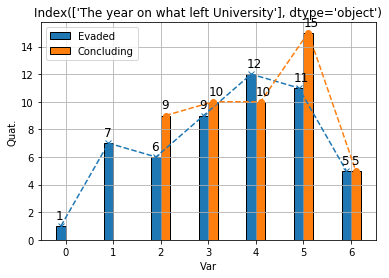

In [25]:
modelsvm.showBarGraph([1])